# Autograder
In the Spring 2022 semester, I had a very heavy teaching load - around 450 students over 5 classes that I was teaching online (and with no teaching assistants!). Because 4 of my courses were quantitative (Data Analysis, International Trade, Probability and Descriptive Statistics, and Supply Chain Analytics), I had to give mid-term and final exams. The mid-term took an absurdly long time to grade by hand (at about 10 per hour, it took me 40 hours to grade the 400 students who took the exam, this on top of normal teaching duties). As a result I decided to turn to Python and automation to grade the final. What follows is the autograder which I developed to assist in grading. 

In [12]:
import os
import re
import docx
import win32com.client as win32
import math
import numpy as np
from scipy.stats import norm
import scipy.stats
import statistics
import time
import matplotlib.pyplot as plt

### Download the Exams from Email

In [40]:
outlook = win32.Dispatch("Outlook.Application").GetNamespace("MAPI")
inbox=outlook.GetDefaultFolder(6)
folder = inbox.Folders.Item("Probability Final")

In [41]:
messages = folder.Items

for message in messages:        
    path = os.path.join('C:\\Users\\HP\\Downloads\\Python\\Final Exams\\Probability',message.Subject)
    if message.Subject not in os.listdir():
        directory = message.Subject
        try:
            os.mkdir(directory)
        except (NotADirectoryError, FileNotFoundError, FileExistsError) as e:
            print(e, directory)
    for attachment in message.Attachments:
        try:
            attachment.SaveAsFile(os.path.join(path, str(attachment).replace(' ','')))
        except:
            print(attachment)

[WinError 3] The system cannot find the path specified: '' 
[WinError 3] The system cannot find the path specified: '2010503007蒋宇如/Allison' 2010503007蒋宇如/Allison
2010503007蒋宇如Allison.doc
Answer Sheet DSP Final.docx


### Answer Key
This function will generate an answer key given a student's number.

In [533]:
os.chdir('C:\\Users\\HP\\Downloads\\Python\\Final Exams\\Probability')

In [5]:
#make the answer key
def generate_prob_key(num):
    prob_key = []

    #1
    N = 60 + num + 6
    A = 60
    n = 10
    x = 10

    answer1 = (math.comb(A,x) * math.comb(N-A,n-x)) / math.comb(N,n)
    prob_key.append(answer1)

    #2
    x = 6
    answer2 = (math.comb(A,x) * math.comb(N-A,n-x)) / math.comb(N,n)
    prob_key.append(answer2)

    #3
    answer3 = 0
    for x in range(3):
        answer3 += (math.comb(A,x) * math.comb(N-A,n-x)) / math.comb(N,n)
    prob_key.append(answer3)

    #4
    prob_key.append('hypergeometric')

    #5
    A = num + 6
    answer5 = (n * A) / N
    prob_key.append(answer5)

    #6
    sigma = num/2
    mu = 150
    z = (160 - mu) / sigma

    answer6 = 1 - norm.cdf(z)
    prob_key.append(answer6)

    #7
    z = (131 - mu) / sigma
    answer7 = norm.cdf(z)
    prob_key.append(answer7)

    #8 next time make the differences smaller, getting some really large z scores
    z1 = (155 - mu) / sigma
    p1 = norm.cdf(z1)

    z2 = (163 - mu) / sigma
    p2 = norm.cdf(z2)

    answer8 = p2 - p1
    prob_key.append(answer8)

    #9
    answer9 = (122 - mu) / sigma
    prob_key.append(answer9)

    #10
    prob_key.append(150)

    #11
    p = num/100
    answer11 = p**15
    prob_key.append(answer11)

    #12
    n = 15
    answer12 = 0
    for x in range(4):
        answer12 += (math.comb(n,x) * p**x * (1-p)**(n-x))

    prob_key.append(answer12)

    #13
    xs = [13, 14, 15]
    answer13 = 0
    for x in xs:    
        answer13 += (math.comb(n,x) * p**x * (1-p)**(n-x))

    prob_key.append(answer13)

    #14
    prob_key.append('binomial')

    #15
    answer15 = n * p * (1-p)
    prob_key.append(answer15)

    #16
    answer16 = n * p
    prob_key.append(answer16)

    #17
    lamb = num + 5

    answer17 = np.exp(-lamb * (1/12))
    prob_key.append(answer17)

    #18
    answer18 = 1 - np.exp(-lamb * (1/30))
    prob_key.append(answer18)

    #19
    prob_less_6 = 1 - np.exp(-lamb * (.1))
    prob_less_3 = 1 - np.exp(-lamb * (.05))
    answer19 = prob_less_6 - prob_less_3
    prob_key.append(answer19)

    #20
    prob_key.append('exponential')

    #21
    answer21 = 60 / lamb
    prob_key.append(answer21)

    #22
    answer22 = num
    prob_key.append(answer22)

    #23
    lamb = num
    x = 0

    answer23 = (np.exp(-lamb) * lamb**x) /  math.factorial(x)
    prob_key.append(answer23)

    #24
    x = 30
    answer24 = (np.exp(-lamb) * lamb**x) /  math.factorial(x)
    prob_key.append(answer24)

    #25 two interpretations of the question
    xs = [25, 26, 27, 28, 29]
    answer25_1 = 0

    for x in xs:
        answer25_1 += (np.exp(-lamb) * lamb**x) /  math.factorial(x)

    xs = [26, 27, 28]
    answer25_2 = 0

    for x in xs:
        answer25_2 += (np.exp(-lamb) * lamb**x) /  math.factorial(x)

    prob_key.append([answer25_1, answer25_2])

    #26
    answer26 = lamb
    prob_key.append(answer26)

    #27
    p = num/100
    n = 510
    sigma2 = n * p * (1-p)
    mu = n * p
    z = (100.5 - mu) / np.sqrt(sigma2)

    answer27 = norm.cdf(z)
    prob_key.append(answer27)

    #28
    z = (209.5 - mu) / np.sqrt(sigma2)
    answer28 = 1 - norm.cdf(z)
    prob_key.append(answer28)

    #29
    z1 = (300.5 - mu) / np.sqrt(sigma2)
    p1 = norm.cdf(z)

    z2 = (350.5 - mu) / np.sqrt(sigma2)
    p2 = norm.cdf(z)

    answer29 = p2 - p1           
    prob_key.append(answer29)

    #30
    answer30 = n * p
    prob_key.append(answer30)

    # multiple choice
    list_o_answers = ['b','c','d','b','a','c','b','a','c','d','d','a','b','c','b','b','a','c','a','c']
    for ans in list_o_answers:
        prob_key.append(ans)

    #51
    L = [num-5, num-3, num, num+10, num+12]
    answer51 = np.sqrt(sum([(l - np.mean(L))**2 for l in L])/(len(L)-1))
    prob_key.append(answer51)

    #52
    sample = [32, 29, 33, 33, 38]
    answer52 = statistics.stdev(sample)
    prob_key.append(answer52)

    #53
    dev_L = [l - np.mean(L) for l in L]
    dev_s = [s - np.mean(sample) for s in sample]
    answer53 = sum([dev_L[i] * dev_s[i] for i in range(len(dev_L))]) / (len(L) - 1)
    prob_key.append(answer53)

    #54
    answer54 = answer53 / (answer52 * answer51)
    prob_key.append(answer54)

    #55
    j = [5,5,4,6]
    answer55 = statistics.variance(j)
    prob_key.append(answer55)

    #56
    Y = [num +10, num - 6, num + 5, num, num - 10]
    X = [2, 4, 3, 2, 7]

    dev_y = [y - np.mean(Y) for y in Y]
    dev_x = [x - np.mean(X) for x in X]

    answer56 = sum([dev_y[i] * dev_x[i] for i in range(len(dev_y))]) / (len(Y) - 1)
    prob_key.append(answer56)

    #57
    sigma_x = statistics.stdev(X)
    sigma_y = statistics.stdev(Y)

    answer57 = answer56 / (sigma_x * sigma_y)
    prob_key.append(answer57)

    #58
    h = [num, 45, 47, 47.5, 51, 53.5, 125]
    answer58 = np.mean(h)
    prob_key.append(answer58)

    #59
    answer59 = np.median(h)
    prob_key.append(answer59)

    #60
    prob_key.append('median')
    
    return prob_key

### Grading Function
This function grades the student's answers using the answer key. I found it was easiest to handle answers depending on the data type of the answer in the answer key. I print out each answer that the function marks wrong so that I can visually inspect it. In the answer key function, where a question had more than one possible right answer (because of ambiguity in the question wording), I returned the answer as a list of possible right answers and check whether the student answer is in the list. I also used tuples in another exam to show ranges (such as confidence intervals) and I inspect those manually as students expressed ranges in many different ways. In the probability exam there are no answers which are ranges (tuples).

The function returns a rough estimate of the student's score and the number of questions they missed. Because these numbers might change upon manual inspection, they are not final, but they do offer a rough guie that I can use to do some rough calculations of class statistics.

In [ ]:
#check student answers
def grade_prob(student_number, s_a):
    
    prob_key = generate_prob_key(student_number)
    missed = 0
    score = 100
    
    #run through and check student answers
    for i in range(len(prob_key)):
        if isinstance(prob_key[i], str):
            if prob_key[i].upper() not in s_a[i] and prob_key[i] not in s_a[i] and prob_key[i].title() not in s_a[i]:
                print(i+1,'Wrong. Student answer: ',s_a[i], ' Correct answer: ',prob_key[i])
                wrong_counts[i+1] += 1
                missed += 1
                if i+1 <= 30 or i+1 > 50:
                    score -= 2
                else:
                    score -= 1

        if isinstance(prob_key[i], list):  # check if any of the answers in the list are correct
            try:
                answer = 'Wrong'
                for item in prob_key[i]:
                    if float(s_a[i][3:].strip()) > item * 0.995 and float(s_a[i][3:].strip()) < item * 1.005:
                        answer = 'Right'
                    elif round(float(s_a[i][3:].strip()),2) == round(item,2):
                        answer = 'Right'
                        
                if answer == 'Wrong':
                    print(i+1,'Wrong. Student answer: ',s_a[i], ' Correct answer: ',prob_key[i])
                    wrong_counts[i+1] += 1
                    missed += 1
                    if i+1 <= 30 or i+1 > 50:
                        score -= 2
                    else:
                        score -= 1
                    
            except (ValueError, TypeError) as e:
                print(i+1,'Inspect Manually')
                print('Student answer: ',s_a[i][3:].strip(), '   Correct answer: ',prob_key[i])

        if isinstance(prob_key[i], tuple):
            print(i+1,'Inspect Manually')
            print('Student answer: ',s_a[i][3:].strip(), '   Correct answer: ',prob_key[i])

        if isinstance(prob_key[i],int) or isinstance(prob_key[i],float):
            try:
                if (float(s_a[i][3:].strip()) < prob_key[i] * 0.995 or float(s_a[i][3:].strip()) > prob_key[i] * 1.005) and round(float(s_a[i][3:].strip()),2) != round(prob_key[i],2):
                    print(i+1,'Wrong. Student answer: ',s_a[i], ' Correct answer: ',prob_key[i])
                    wrong_counts[i+1] += 1
                    missed += 1
                    if i+1 <= 30 or i+1 > 50:
                        score -= 2
                    else:
                        score -= 1
                    
            except ValueError:
                print(i+1, 'Inspect Manually')
                print('Student answer: ',s_a[i][3:].strip(), '   Correct answer: ',prob_key[i])
                
    return score, missed

In [ ]:
#create a dictionary to hold the count of how many students got each question wrong and a dictionary to hold student scores
wrong_counts = {}

for i in range(60):
    wrong_counts[i+1] = 0

student_scores = {}

### Loop Through and Grade the Students' Exams
This block of code loops through the students answer sheets, extracts their answers, compares them with a generated answer key and prints out the questions the students got wrong or questions that should be manually checked. I want to manually check all wrong answers as sometimes a student might enter a correct answer in an unexpected format (e.g. 3,14 instead of 3.14 or 2.55 x 10-3 instead of 0.00255).

In [ ]:
#loop through files and extract the answers
for folder in os.listdir():
    for file in os.listdir(folder):
        if file[-5:] == '.docx' or file[-4:] == '.doc':
            print(file)
            doc = docx.Document(folder + '/' + file)
            try:
                student_number = int(doc.paragraphs[2].text.replace('_','')[-2:])
            except ValueError:
                student_number = int(file[8:10]) 

            print(student_number)
            student_answers = []
            
            for para in doc.paragraphs:
                student_answers.append(para.text.replace('_',''))
                
            s_a = []
            for row in student_answers:
                #only get rows that start with numbers
                try:
                    int(row[0])
                    for item in row.replace('\t','').split(';'):
                        s_a.append(item)
        
                except:
                    pass
    
            s_a = [x for x in s_a if len(x) > 0]

            #grade the answers and save the student scores and how many questions they missed
            score, missed = grade_prob(student_number, s_a)
            student_scores[student_number] = (score, missed)
            print('*************************************************')

For privacy reasons, I will not show the full output, as it containts student numbers and names and which questions they likely got wrong. But here is a sample with the student's name redacted.They were student \#93 in my class. We can see that the function flagged some of their answers for manual inspection because, while correct, the answer's format did not match the expected format.

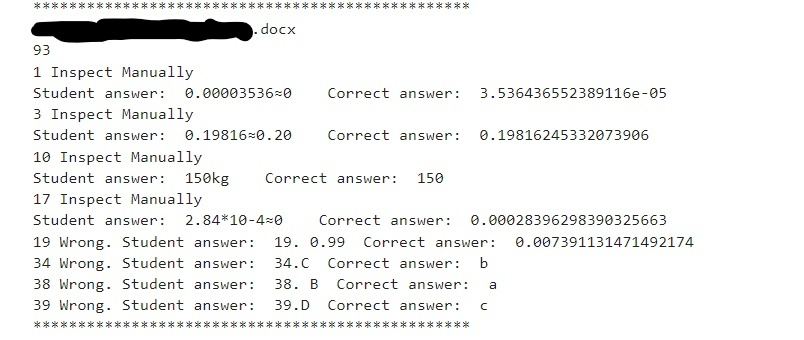

### Create Answer Key for Manual Grading
Some exams required manual grading because they were submitted as pdfs. Because there were relatively few such files, it was quicker to manually grade them than to qrite another function to convert them to a word document and deal with formatting. Below is an example of one answer key generated for manual grading.

In [6]:
#manually inspect student #86's exam
for i, line in enumerate(generate_prob_key(86)):
    print(i+1, line)

1 5.623458267015637e-05
2 0.10433772374333507
3 0.16714266757377222
4 hypergeometric
5 6.052631578947368
6 0.40805226794423843
7 0.32929509042074734
8 0.07251374696174806
9 -0.6511627906976745
10 150
11 0.10410624174646739
12 1.7038401999564727e-08
13 0.6480036431909645
14 binomial
15 1.8060000000000003
16 12.9
17 0.0005088621855732917
18 0.9518451458788036
19 0.010455538575362522
20 exponential
21 0.6593406593406593
22 86
23 4.4737793061811207e-38
24 1.8279656004194624e-12
25 [9.51320782581595e-13, 3.070134376820573e-13]
26 86
27 0.0
28 1.0
29 0.0
30 438.59999999999997
31 b
32 c
33 d
34 b
35 a
36 c
37 b
38 a
39 c
40 d
41 d
42 a
43 b
44 c
45 b
46 b
47 a
48 c
49 a
50 c
51 7.726577508832744
52 3.24037034920393
53 19.25
54 0.7688629236876701
55 0.6666666666666666
56 -13.849999999999998
57 -0.82716423433706
58 65.0
59 51.0
60 median


This autograder greatly reduced the amount of time I spend grading exams - from roughly 6-10 minutes per exam (on the shorter mid-term) to only 2-3 minutes (accounting for time for manual inspection). With a mutliple choice exam or other exam where students cannot submit open answers, the time needed to grade per exam would be minimal.